<a href="https://colab.research.google.com/github/Wolferlk/DL-Lab2-it22004840/blob/main/it22004840_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IT22004840_lab_2**

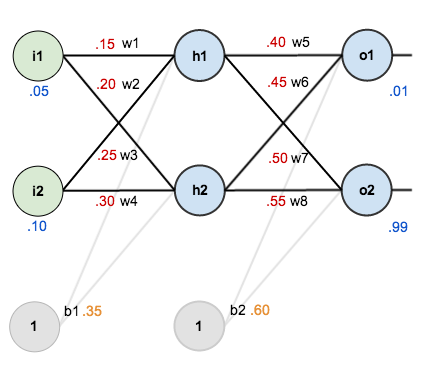

In [ ]:
from IPython.display import Image
Image("image.png")

Iteration 0: Error = 0.298371
Iteration 500: Error = 0.002731
Iteration 1000: Error = 0.001146
Iteration 1500: Error = 0.000678
Iteration 2000: Error = 0.000462
Iteration 2500: Error = 0.000340
Iteration 3000: Error = 0.000263
Iteration 3500: Error = 0.000211
Iteration 4000: Error = 0.000173
Iteration 4500: Error = 0.000145

Final Results:
W1 = 
[[0.289  0.3348]
 [0.3885 0.4428]] 

W2 = 
[[-3.7201 -3.6701]
 [ 2.6755  2.7255]]
Output = [[0.0212 0.979 ]] 
Desired = [[0.01 0.99]] 
Final Error = 0.00012291694588416547


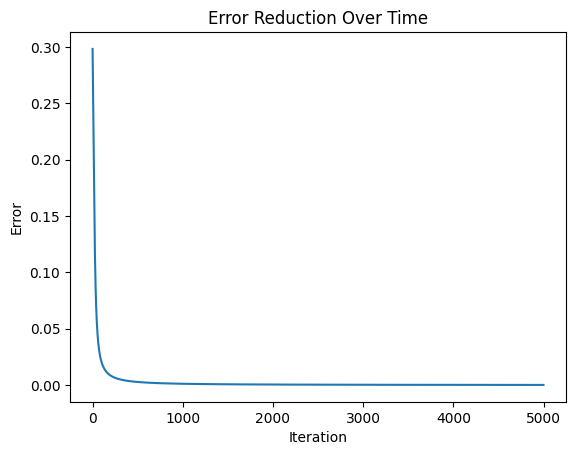

In [ ]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb


import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(5000)                                                             # Modify Number of Iterations_lab2
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    errors = []
    for iter in range(no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        errors.append(E)
        if iter % 500 == 0:
            print(f"Iteration {iter}: Error = {E:.6f}")

    print("\nFinal Results:")
    print(f"W1 = \n{W1} \n\nW2 = \n{W2}")
    print(f"Output = {A2} \nDesired = {Y} \nFinal Error = {E}")

    # Plot error vs iterations
    import matplotlib.pyplot as plt
    plt.plot(errors)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Error Reduction Over Time")
    plt.show()

main()